# **Project 2**, APS1070 Fall 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Oct 27, 9 PM - 13 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Tongfei Li
*   Student Number: 1004759460

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? __284807___ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  __Time, Amount and Class___ **[0.1]**
* Which column contains the targets? The Last (31st) colomn of 'Class' **[0.1]**
* What is the meaning of target values?___The target value 'Class' indicates if there is a faurd detection in Credit Card transactions, it takes value of 1 in case of faurd, 0 otherwise.__ **[0.1]**

In [1]:
pip install wget

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=f068b7b65b244a0a20c4b667036834668b12f0d0ca3928108608f62b03ecc87d
  Stored in directory: /Users/tongfeili/Library/Caches/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1045)>

In [3]:
!tar -zxvf creditcard.tar.gz

tar: Error opening archive: Failed to open 'creditcard.tar.gz'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
### YOUR CODE HERE ###

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
* What metrics should we use to evaluate a model in such cases _________ **[0.2]**


In [3]:
### YOUR CODE HERE ###
print('Q1. What is the percentage of entries in the dataset for each class?')
print(len(df[df['Class']==0])/len(df)*100,'% of entries in dataset for class 0')
print(len(df[df['Class']==1])/len(df)*100,'% of entries in dataset for class 1')
print('Q2. Is this data considered balanced or unbalanced? Why is this the case?')
print('The dataset is unbalanced, since there are much more samples for output class 0 than output class 1.')
print('Q3. Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?')
print('A balanced dataset is important for training an accurate model for anomaly detection, a balanced number for each output type can prevent the model from increasing its accuracy by predicting the majority output type.')
print('For a KNN classifier, for example, if there are too many samples of type 0 in training data, we may find the majority points that are closest to the prediction point to be type 0, even if the predicted value should be type 1, no matter how we select k value.')
print('Q4. What metrics should we use to evaluate a model in such cases?')
print('We might try confusion matrix, F1 score and ROC for this case.')


Q1. What is the percentage of entries in the dataset for each class?
99.82725143693798 % of entries in dataset for class 0
0.1727485630620034 % of entries in dataset for class 1
Q2. Is this data considered balanced or unbalanced? Why is this the case?
The dataset is unbalanced, since there are much more samples for output class 0 than output class 1.
Q3. Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?
A balanced dataset is important for training an accurate model for anomaly detection, a balanced number for each output type can prevent the model from increasing its accuracy by predicting the majority output type.
For a KNN classifier, for example, if there are too many samples of type 0 in training data, we may find the majority points that are closest to the prediction point to be type 0, even if the predicted value should be type 1, no matter how we select k value.
Q4. What metrics should we use

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
### Split the data  ###

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,0:30], df.iloc[:,[30]], test_size=0.15, random_state=40)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2/0.85, random_state=40)

# X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
#X_train.append(X_val) 242085
#X_train 185123
#X_val 56962
pd.DataFrame(X_train.append(X_val)['V1'])

,V1
205223,2.155312
105129,1.075676
164416,2.075854
22283,0.441920
68585,-0.877222
...,...
46326,-2.992954
214502,-1.097223
57594,-0.762411
4790,1.225836


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [6]:
X_train[y_train['Class']==1]['V1']

44001     -2.144411
124087     1.118560
150668   -10.632375
44270    -20.906908
153835   -22.341889
            ...    
235616     0.218810
44556     -4.566342
150679   -12.833631
52584     -1.519244
183106     0.224414
Name: V1, Length: 322, dtype: float64

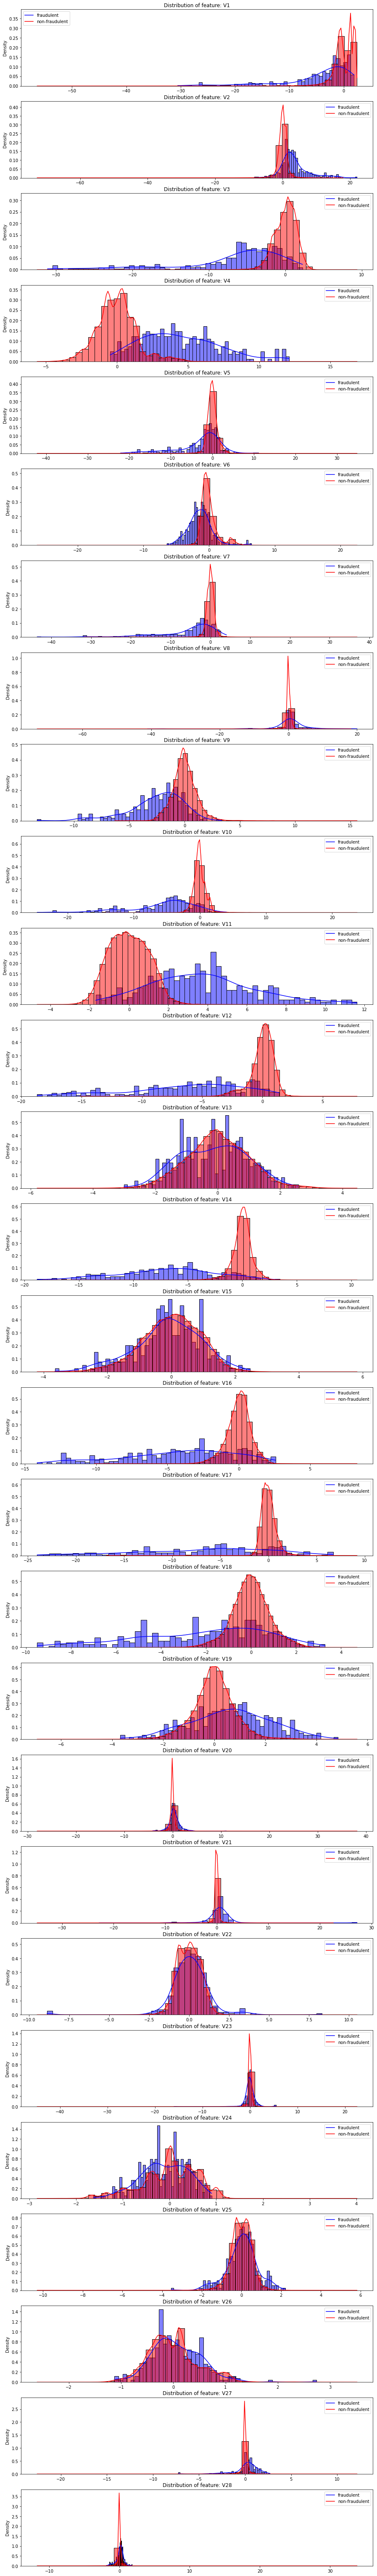

In [7]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[y_train['Class']==1][feat], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[y_train['Class']==0][feat], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

For anomaly detection, we want to efficiently recognize fraudulent transaction out of valid transaction. These graphs provides us imformation of how fraud and non-fraud transaction distributes in each feature. If for one feature, the Gaussian distribution of fraud and non-fraud transaction varies from each other (have different mean/peak, or different varience), then this feature can be a good candidate for anomaly detection on Gaussian model.

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
----Do we optimize threshold again??? ------ 
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
### YOUR CODE HERE ###
from sklearn.mixture import GaussianMixture
## a.1.
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm1.fit(X_train)
## a.2.
from sklearn.metrics import roc_auc_score
p_full = gm1.score_samples(X_train)
print ("AUC of Single Component on full training set" , format(roc_auc_score(y_train, -1 * p_full), ".3f"))
p_val = gm1.score_samples(X_val)
print ("AUC of Single Component on validation set" , format(roc_auc_score(y_val, -1 * p_val), ".3f"))


AUC of Single Component on full training set 0.948
AUC of Single Component on validation set 0.948


In [13]:
##a.3.
feature = []
AUC_full = []
AUC_validate = []
for n in range(1,29): #iterate among all "V" features
    feature.append('V'+str(n))
    gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
    gm1.fit(pd.DataFrame(X_train['V'+str(n)]))
    p_full = gm1.score_samples(pd.DataFrame(X_train['V'+str(n)]))
    p_val = gm1.score_samples(pd.DataFrame(X_val['V'+str(n)]))
    AUC_full.append(roc_auc_score(y_train, -1 * p_full))
    AUC_validate.append(roc_auc_score(y_val, -1 * p_val))


part a.3

Table: present AUC of full and validation dataset of each feature

In [14]:
tb=pd.DataFrame(AUC_full,index=feature,columns =['AUC_train'])
tb['AUC_validate']=AUC_validate
tb

,AUC_train,AUC_validate
V1,0.692540,0.716118
V2,0.848245,0.852456
V3,0.870004,0.856759
V4,0.889715,0.883280
V5,0.761153,0.781160
V6,0.727997,0.721413
V7,0.865497,0.887163
V8,0.774903,0.790317
V9,0.799279,0.794323
V10,0.910025,0.917279


part a.4.

In [15]:
# a.4.
va = AUC_validate
print('The 1st best feature is:',feature[va.index(max(va))],', with value:', max(va))
va[va.index(max(va))]=0
print('The 2st best feature is:',feature[va.index(max(va))],', with value:', max(va))
va[va.index(max(va))]=0
print('The 3st best feature is:',feature[va.index(max(va))],', with value:', max(va))

The 1st best feature is: V14 , with value: 0.9550654169511631
The 2st best feature is: V17 , with value: 0.9256977923072147
The 3st best feature is: V10 , with value: 0.9172792824481181


part a.5.

In [16]:
#a.5.
from sklearn.metrics import f1_score
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
### V14 ###
gm1.fit(pd.DataFrame(X_train['V14']))
p_val = gm1.score_samples(pd.DataFrame(X_val['V14']))
# we want to focus on p value that are larger, so we start from (lowest of p)/2
lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)
            
while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V14: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))

### V17 ###
gm1.fit(pd.DataFrame(X_train['V17']))
p_val = gm1.score_samples(pd.DataFrame(X_val['V17']))
# max(p_val)
lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i


print('V17: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))


### V10 ###
gm1.fit(pd.DataFrame(X_train['V10']))
p_val = gm1.score_samples(pd.DataFrame(X_val['V10']))
# max(p_val)
lo = min(p_val)/2.1
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))


# tr_list = [  -25,-20,-18, -10 ,-7, -6 ,  -5 ,-2,-1,0,1]
# for tr in tr_list:
#     f1 = f1_score(y_val, p_val<=tr)
#     print ("Threshold:" , "{:.3f}".format(tr), " F1 Score: ", "{:.2f}".format(f1))

V14: optimal threshold that maximizes the F1 Score: -19 , with F1 score: 0.6130653266331658
V17: optimal threshold that maximizes the F1 Score: -22 , with F1 score: 0.5942857142857142
V10: optimal threshold that maximizes the F1 Score: -53 , with F1 score: 0.20740740740740743


part a.6.

In [80]:
# a.6.Report Precision, Recall and F1 score on both training and validation set 
# in a table using the threshold you found in previous step.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pre=[]
rec=[]
f1=[]


gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
### V14 ###
gm1.fit(pd.DataFrame(X_train['V14']))
## training
p_val = gm1.score_samples(pd.DataFrame(X_train['V14']))
pre.append(precision_score(y_train, p_val < -19)) 
rec.append(recall_score(y_train, p_val < -19))
f1.append(f1_score(y_train, p_val < -19))

## validation
p_val = gm1.score_samples(pd.DataFrame(X_val['V14']))
pre.append(precision_score(y_val, p_val < -19)) 
rec.append(recall_score(y_val, p_val < -19))
f1.append(f1_score(y_val, p_val < -19))


### V17 ###
gm1.fit(pd.DataFrame(X_train['V17']))
## training
p_val = gm1.score_samples(pd.DataFrame(X_train['V17']))
pre.append(precision_score(y_train, p_val < -22)) 
rec.append(recall_score(y_train, p_val < -22))
f1.append(f1_score(y_train, p_val < -22))

## validation
p_val = gm1.score_samples(pd.DataFrame(X_val['V17']))
pre.append(precision_score(y_val, p_val < -22)) 
rec.append(recall_score(y_val, p_val < -22))
f1.append(f1_score(y_val, p_val < -22))

### V10 ###
gm1.fit(pd.DataFrame(X_train['V10']))
## training
p_val = gm1.score_samples(pd.DataFrame(X_train['V10']))
pre.append(precision_score(y_train, p_val < -53)) 
rec.append(recall_score(y_train, p_val < -53))
f1.append(f1_score(y_train, p_val < -53))

## validation
p_val = gm1.score_samples(pd.DataFrame(X_val['V10']))
pre.append(precision_score(y_val, p_val < -53)) 
rec.append(recall_score(y_val, p_val < -53))
f1.append(f1_score(y_val, p_val < -53))


In [82]:
tb=pd.DataFrame(pre,index=[['V14']*2 + ['V17']*2 + ['V10']*2],columns =['precision'])
tb['recall']=rec
tb['F1']=f1
tb['threshold']=[-19,-19,-22,-22,-53,-53]
tb['type']=['training','validation','training','validation','training','validation']
tb


,precision,recall,F1,threshold,type
V14,0.583596,0.574534,0.579030,-19,training
V14,0.628866,0.598039,0.613065,-19,validation
V17,0.653061,0.496894,0.564374,-22,training
V17,0.712329,0.509804,0.594286,-22,validation
V10,0.410448,0.170807,0.241228,-53,training
V10,0.424242,0.137255,0.207407,-53,validation


a.7. Report the complexity of your method (Big O notation) for determining the optimal threshold.

Complexity is O(log2(n)) for n = length of range from min of p to max of p. Because I get the range of (min(p),max(p)) at first, which is the range that I would find optimized threshold. I cut the range into half in each iteration and continue with the piece that has growing trend on F1 value. Since the F1 increase and then decrease with p, we have a convex curve, the loop stop until we reach the highest point.

part b.1. Pick 3 features that had the best AUC in Part 2a:

V14, V17, V10


In [19]:
# get the full training data with class=0
non_frau = X_train[y_train['Class']==0]
non_frau

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
205223,135642.0,2.155312,-0.702101,-0.896062,-0.495048,-0.524891,-0.351258,-0.596595,-0.200968,-0.372711,...,-0.469586,-0.365544,-0.405286,0.288721,0.611606,-0.285025,0.530141,-0.028873,-0.042608,14.63
105129,69377.0,1.075676,-0.281544,1.317319,0.752709,-0.977419,0.361756,-0.815565,0.359194,0.695108,...,-0.140786,-0.000545,0.171275,0.074325,0.252557,0.113667,0.317260,0.027618,0.015541,11.50
164416,116702.0,2.075854,-1.039279,-2.552907,-1.656574,1.602910,3.417467,-1.497547,0.935236,-0.098205,...,0.161886,0.252794,0.648876,0.120906,0.605362,-0.121393,-0.069879,0.043628,-0.013396,44.00
22283,32147.0,0.441920,-1.524804,1.695613,1.895879,-1.693844,1.514354,-1.126757,0.660978,1.748996,...,0.324417,0.321254,0.765937,-0.377553,0.064736,0.338659,-0.112767,0.075010,0.074952,292.10
68585,53051.0,-0.877222,-0.816723,1.105515,-0.593497,-0.926230,1.901631,1.082098,0.379891,0.312841,...,0.822576,0.050635,-0.281638,0.676870,-1.279939,-0.066270,0.985092,-0.127247,0.019766,382.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42855,41273.0,-1.014579,0.663307,1.462887,-0.467241,-0.931172,-0.046189,1.866899,-0.199587,-0.490845,...,-0.151702,0.023823,0.010979,0.077526,0.402167,-0.016886,0.105068,0.003749,0.026431,260.00
97626,66302.0,-1.624255,-0.015235,2.150355,1.672524,-1.347854,-0.053651,0.208339,0.530063,-0.395923,...,0.602183,0.422834,0.675464,0.250837,0.714182,0.356818,-0.091669,-0.058074,-0.028872,229.00
9005,12496.0,1.166873,-0.391233,1.099740,0.299399,-1.046431,0.018657,-0.960134,0.188688,2.182781,...,-0.137603,-0.054159,0.094817,-0.068511,0.006558,0.145078,1.075447,-0.080268,-0.004308,27.66
45338,42300.0,1.038969,0.188921,1.531422,2.542821,-0.518293,0.950173,-0.707302,0.424535,-0.217759,...,-0.155935,-0.001881,0.168040,0.056388,0.018531,0.209087,-0.032145,0.058365,0.023055,0.76


part b.2.

In [63]:
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
### V14 ###
gm1.fit(pd.DataFrame(non_frau['V14']))
p_val = gm1.score_samples(pd.DataFrame(X_val['V14']))
# we want to focus on p value that are larger, so we start from (lowest of p)/2
lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)/3),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)

while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V14: on non-fraud transactions: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))


### V17 ###
gm1.fit(pd.DataFrame(non_frau['V17']))
p_val = gm1.score_samples(pd.DataFrame(X_val['V17']))
# max(p_val)
lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)

while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i


print('V17: on non-fraud transactions: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))


### V10 ###
gm1.fit(pd.DataFrame(non_frau['V10']))
p_val = gm1.score_samples(pd.DataFrame(X_val['V10']))
# max(p_val)
lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)/2),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10: on non-fraud transactions: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))


V14: on non-fraud transactions: optimal threshold that maximizes the F1 Score: -22 , with F1 score: 0.6192893401015229
V17: on non-fraud transactions: optimal threshold that maximizes the F1 Score: -22 , with F1 score: 0.5876288659793814
V10: on non-fraud transactions: optimal threshold that maximizes the F1 Score: -30 , with F1 score: 0.21296296296296297


In [83]:
# b.2. repeat part 2a to compute AUC, F1 score, Precision and Recall 
# when you fit a Gaussian only on non-fraudulent transactions 
# in the training set in step 1 (instead of all the transactions).
auc=[]
pre=[]
rec=[]
f1=[]


gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
### V14 ###
gm1.fit(pd.DataFrame(non_frau['V14']))


## training
p_train = gm1.score_samples(pd.DataFrame(X_train['V14']))
auc.append(roc_auc_score(y_train, -1 * p_train))
pre.append(precision_score(y_train, p_train < -22)) 
rec.append(recall_score(y_train, p_train < -22))
f1.append(f1_score(y_train, p_train < -22))

## validation
p_val = gm1.score_samples(pd.DataFrame(X_val['V14']))
auc.append(roc_auc_score(y_val, -1 * p_val))
pre.append(precision_score(y_val, p_val < -22)) 
rec.append(recall_score(y_val, p_val < -22))
f1.append(f1_score(y_val, p_val < -22))


### V17 ###
gm1.fit(pd.DataFrame(non_frau['V17']))

## training
p_train = gm1.score_samples(pd.DataFrame(X_train['V17']))
auc.append(roc_auc_score(y_train, -1 * p_train))
pre.append(precision_score(y_train, p_train < -22)) 
rec.append(recall_score(y_train, p_train < -22))
f1.append(f1_score(y_train, p_train < -22))

## validation
p_val = gm1.score_samples(pd.DataFrame(X_val['V17']))
auc.append(roc_auc_score(y_val, -1 * p_val))
pre.append(precision_score(y_val, p_val < -22)) 
rec.append(recall_score(y_val, p_val < -22))
f1.append(f1_score(y_val, p_val < -22))

                          
### V10 ###
gm1.fit(pd.DataFrame(non_frau['V10']))
## training
p_train = gm1.score_samples(pd.DataFrame(X_train['V10']))
auc.append(roc_auc_score(y_train, -1 * p_train))
pre.append(precision_score(y_train, p_train < -30)) 
rec.append(recall_score(y_train, p_train < -30))
f1.append(f1_score(y_train, p_train < -30))

## validation
p_val = gm1.score_samples(pd.DataFrame(X_val['V10']))
auc.append(roc_auc_score(y_val, -1 * p_val))
pre.append(precision_score(y_val, p_val < -30)) 
rec.append(recall_score(y_val, p_val < -30))
f1.append(f1_score(y_val, p_val < -30))



In [84]:
tb2=pd.DataFrame(pre,index=[['V14']*2 + ['V17']*2 + ['V10']*2],columns =['precision_nonfrau'])
tb2['recall_nonfrau']=rec
tb2['F1_nonfrau']=f1
tb2['threshold_nonfrau']=[-22,-22,-22,-22,-30,-30]
tb2['AUC_nonfrau']=auc
tb2['type']=['training','validation','training','validation','training','validation']
tb2



,precision_nonfrau,recall_nonfrau,F1_nonfrau,threshold_nonfrau,AUC_nonfrau,type
V14,0.627119,0.574534,0.599676,-22,0.948317,training
V14,0.642105,0.598039,0.619289,-22,0.954915,validation
V17,0.590164,0.559006,0.574163,-22,0.928398,training
V17,0.619565,0.558824,0.587629,-22,0.925267,validation
V10,0.184466,0.236025,0.207084,-30,0.910169,training
V10,0.201754,0.225490,0.212963,-30,0.917267,validation


part b.3.

Compare your results from parts 2a and 2b in a table (for both training and validation set).

In one table:

In [86]:
pd.concat([tb.iloc[:,0:4], tb2], axis=1)

,precision,recall,F1,threshold,precision_nonfrau,recall_nonfrau,F1_nonfrau,threshold_nonfrau,AUC_nonfrau,type
V14,0.583596,0.574534,0.579030,-19,0.627119,0.574534,0.599676,-22,0.948317,training
V14,0.628866,0.598039,0.613065,-19,0.642105,0.598039,0.619289,-22,0.954915,validation
V17,0.653061,0.496894,0.564374,-22,0.590164,0.559006,0.574163,-22,0.928398,training
V17,0.712329,0.509804,0.594286,-22,0.619565,0.558824,0.587629,-22,0.925267,validation
V10,0.410448,0.170807,0.241228,-53,0.184466,0.236025,0.207084,-30,0.910169,training
V10,0.424242,0.137255,0.207407,-53,0.201754,0.225490,0.212963,-30,0.917267,validation


part b.4.

Are these results different or similar? Why?

The results are similar, we get low precision, recall and F1 score regardless we fit one Gaussian on full data or on only non-fraud transaction. This is because we are using the threshold that gives highest F1, F1 score values both presition and recall. 

For one Gaussian on all training and validation samples, we have a highly unbalanced dataset, so it is difficult to recognize fraud transaction out of valid transaction because the we mostly capture signals from valid data.

For one Gaussian on only non-fraud transaction, it therefore becomes harder for anomaly detection, because the model does not even learn/fit on the fraud transaction data, so we still have low F1 score.

## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




# PICK V10V11

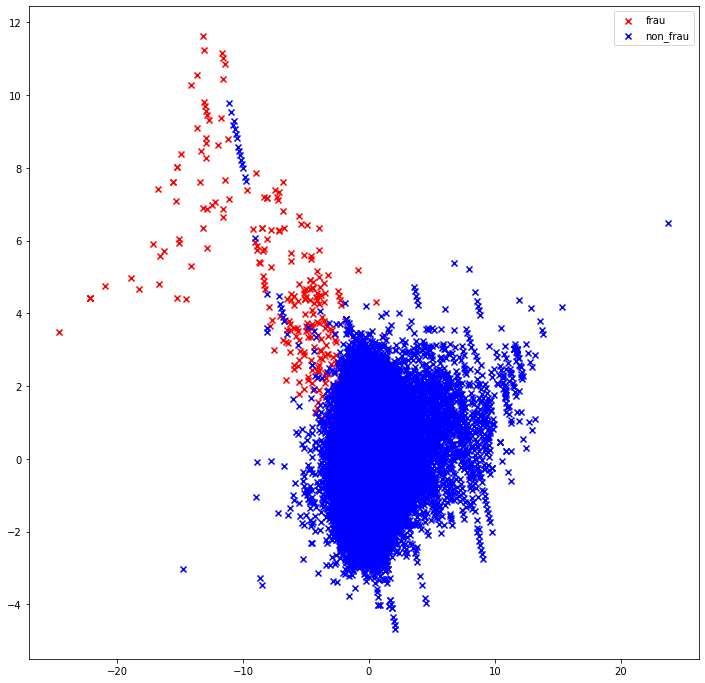

In [23]:
# 3.1
### PICK V10V11 ###
# 3.2 - 3.3
plt.figure(figsize=(12,12))
plt.scatter(X_train[y_train['Class']==1]['V10'],X_train[y_train['Class']==1]['V11'],marker="x",c='r', label='frau')
plt.scatter(X_train[y_train['Class']==0]['V10'],X_train[y_train['Class']==0]['V11'],marker="x",c='b', label='non_frau')

plt.legend()
plt.show()

Part 3.4
Based on the plot, when we look at valid transactions (blue), we can only observe one density region, so I would like to choose to fit the data in 1 component.

In [24]:
# 3.5
V10_train = X_train['V10']
V11_train = X_train['V11']
V10_val = X_val['V10']
V11_val = X_val['V11']

V10V11_train = pd.concat([V10_train, V11_train], axis = 1)
V10V11_val = pd.concat([V10_val, V11_val], axis = 1)

gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

gm3.fit(pd.DataFrame(V10V11_train))
# 3.6
p_train = gm3.score_samples(pd.DataFrame(V10V11_train))
p_val = gm3.score_samples(pd.DataFrame(V10V11_val))

print("AUC training Gaussian model with V10 & V11:",roc_auc_score(y_train, -1 * p_train))
print("AUC validation Gaussian model with V10 & V11:",roc_auc_score(y_val, -1 * p_val))


AUC training Gaussian model with V10 & V11: 0.9269168873645888
AUC validation Gaussian model with V10 & V11: 0.9143155186802122


part 3.7

# PICK V10V14

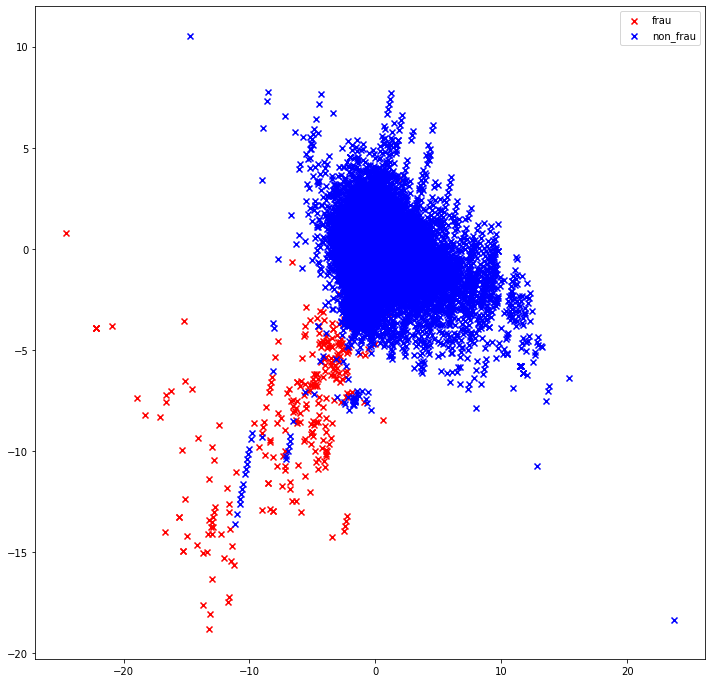

In [25]:
# 3.7.1
### PICK V10V14 ###

# 3.2 - 3.3
plt.figure(figsize=(12,12))
plt.scatter(X_train[y_train['Class']==1]['V10'],X_train[y_train['Class']==1]['V14'],marker="x",c='r', label='frau')
plt.scatter(X_train[y_train['Class']==0]['V10'],X_train[y_train['Class']==0]['V14'],marker="x",c='b', label='non_frau')

plt.legend()
plt.show()

Part 3.4
Based on the plot, when we look at valid transactions (blue), we can only observe one density region, so I would like to choose to fit the data in 1 component.

In [26]:
# 3.5
V10_train = X_train['V10']
V14_train = X_train['V14']
V10_val = X_val['V10']
V14_val = X_val['V14']

V10V14_train = pd.concat([V10_train, V14_train], axis = 1)
V10V14_val = pd.concat([V10_val, V14_val], axis = 1)

gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

gm3.fit(pd.DataFrame(V10V14_train))
# 3.6
p_train = gm3.score_samples(pd.DataFrame(V10V14_train))
p_val = gm3.score_samples(pd.DataFrame(V10V14_val))

print("AUC training Gaussian model with V10 & V14:",roc_auc_score(y_train, -1 * p_train))
print("AUC validation Gaussian model with V10 & V14:",roc_auc_score(y_val, -1 * p_val))



AUC training Gaussian model with V10 & V14: 0.9481965005096469
AUC validation Gaussian model with V10 & V14: 0.9624168063285814


# PICK V11V14

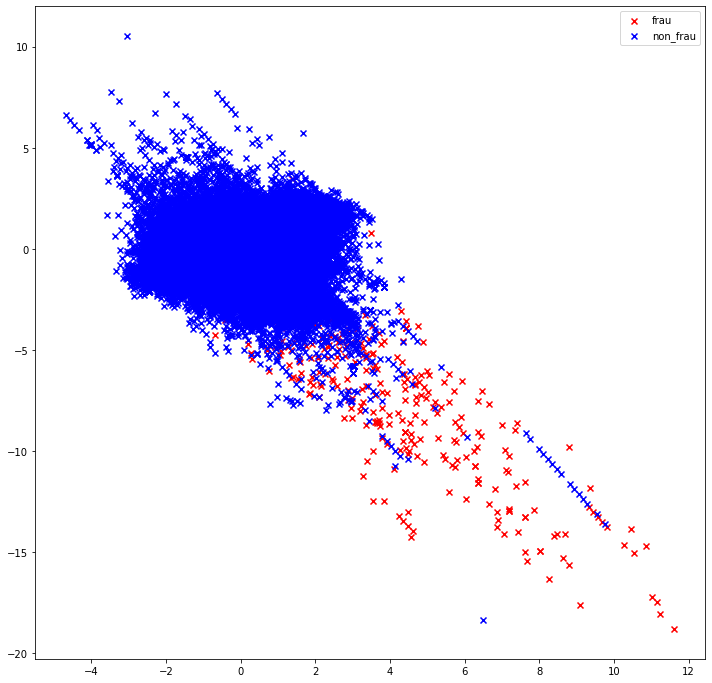

In [27]:
# 3.7.2
### PICK V11V14 ###

# 3.2 - 3.3
plt.figure(figsize=(12,12))
plt.scatter(X_train[y_train['Class']==1]['V11'],X_train[y_train['Class']==1]['V14'],marker="x",c='r', label='frau')
plt.scatter(X_train[y_train['Class']==0]['V11'],X_train[y_train['Class']==0]['V14'],marker="x",c='b', label='non_frau')

plt.legend()
plt.show()

Part 3.4
Based on the plot, when we look at valid transactions (blue), we can only observe one density region, so I would like to choose to fit the data in 1 component.

In [28]:
# 3.5
V11_train = X_train['V11']
V14_train = X_train['V14']
V11_val = X_val['V11']
V14_val = X_val['V14']

V11V14_train = pd.concat([V11_train, V14_train], axis = 1)
V11V14_val = pd.concat([V11_val, V14_val], axis = 1)

gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

gm3.fit(pd.DataFrame(V11V14_train))
# 3.6
p_train = gm3.score_samples(pd.DataFrame(V11V14_train))
p_val = gm3.score_samples(pd.DataFrame(V11V14_val))

print("AUC training Gaussian model with V11 & V14:",roc_auc_score(y_train, -1 * p_train))
print("AUC validation Gaussian model with V11 & V14:",roc_auc_score(y_val, -1 * p_val))

AUC training Gaussian model with V11 & V14: 0.9528279723150916
AUC validation Gaussian model with V11 & V14: 0.9501313856531005


# PICK V13V14

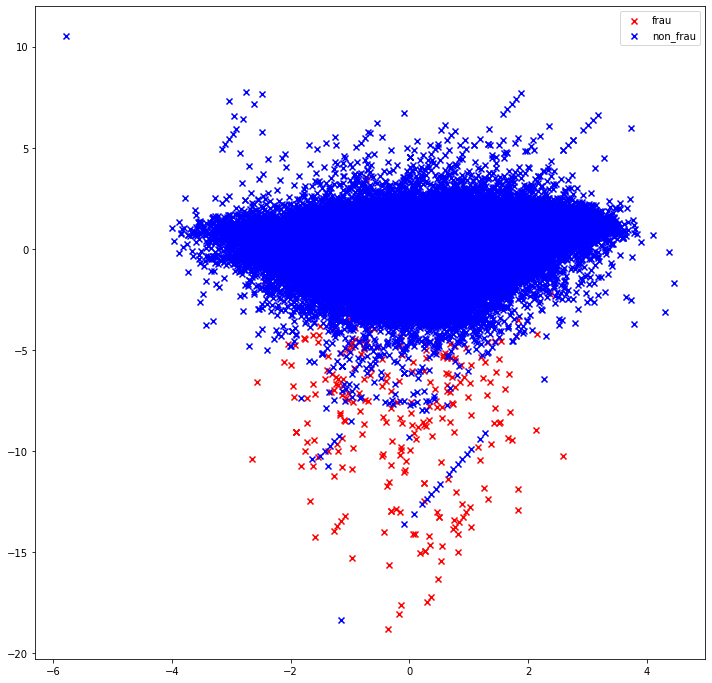

In [29]:
# 3.7.3
### PICK V13V14 ###

# 3.2 - 3.3
plt.figure(figsize=(12,12))
plt.scatter(X_train[y_train['Class']==1]['V13'],X_train[y_train['Class']==1]['V14'],marker="x",c='r', label='frau')
plt.scatter(X_train[y_train['Class']==0]['V13'],X_train[y_train['Class']==0]['V14'],marker="x",c='b', label='non_frau')

plt.legend()
plt.show()

Part 3.4
Based on the plot, when we look at valid transactions (blue), we can only observe one density region, so I would like to choose to fit the data in 1 component.

In [30]:
# 3.5
V13_train = X_train['V13']
V14_train = X_train['V14']
V13_val = X_val['V13']
V14_val = X_val['V14']

V13V14_train = pd.concat([V13_train, V14_train], axis = 1)
V13V14_val = pd.concat([V13_val, V14_val], axis = 1)

gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

gm3.fit(pd.DataFrame(V13V14_train))
# 3.6
p_train = gm3.score_samples(pd.DataFrame(V13V14_train))
p_val = gm3.score_samples(pd.DataFrame(V13V14_val))

print("AUC training Gaussian model with V11 & V14:",roc_auc_score(y_train, -1 * p_train))
print("AUC validation Gaussian model with V11 & V14:",roc_auc_score(y_val, -1 * p_val))

AUC training Gaussian model with V11 & V14: 0.9492918872847648
AUC validation Gaussian model with V11 & V14: 0.9498643037939762


part 3.8

PICK V10 & V14 since they have highest AUC (0.96) on validation

In [31]:
# 3.9
gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

gm3.fit(pd.DataFrame(V10V14_train))
p_val = gm3.score_samples(V10V14_val)
# max(p_val)
lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))




V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -42 , with F1 score: 0.4854368932038835


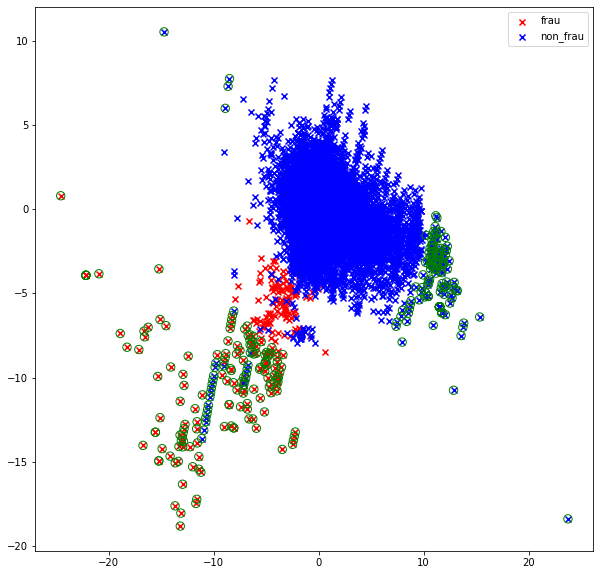

In [32]:
# 3.10
# training
plt.figure(figsize=(10,10))



plt.scatter(X_train[y_train['Class']==1]['V10'],X_train[y_train['Class']==1]['V14'],marker="x",c='r', label='frau')
plt.scatter(X_train[y_train['Class']==0]['V10'],X_train[y_train['Class']==0]['V14'],marker="x",c='b', label='non_frau')

p_train = gm3.score_samples(V10V14_train)
outliers = np.nonzero(p_train<-47)[0]
plt.scatter(V10V14_train['V10'].iloc[outliers],V10V14_train['V14'].iloc[outliers],marker="o",facecolor="none",edgecolor="g",s=70);

plt.legend()
plt.show()

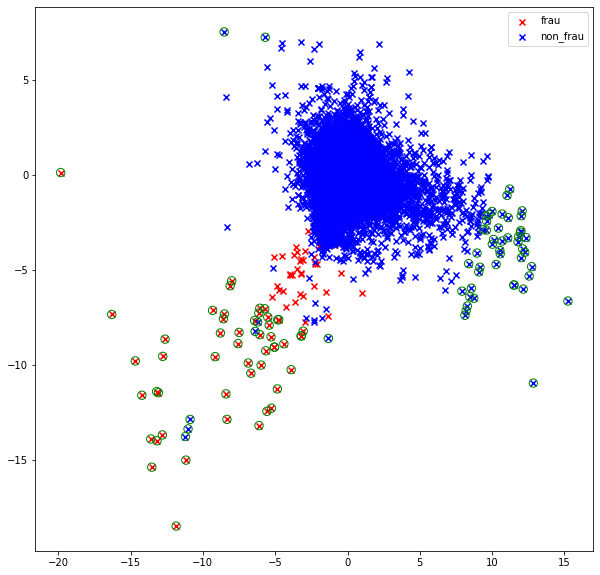

In [33]:
# validation
plt.figure(figsize=(10,10))



plt.scatter(X_val[y_val['Class']==1]['V10'],X_val[y_val['Class']==1]['V14'],marker="x",c='r', label='frau')
plt.scatter(X_val[y_val['Class']==0]['V10'],X_val[y_val['Class']==0]['V14'],marker="x",c='b', label='non_frau')

p_train = gm3.score_samples(V10V14_val)
outliers = np.nonzero(p_train<-42)[0]
plt.scatter(V10V14_val['V10'].iloc[outliers],V10V14_val['V14'].iloc[outliers],marker="o",facecolor="none",edgecolor="g",s=70);

plt.legend()
plt.show()

In these two plots, I use red color to indicate fraud transaction and blue to indicate valid transactions. In addition, a green circle is to recognize the outlier points, I set -42 as the threshold for outliers (as I got from the previous part).

From the two plots above, we can observe that this gaussian model recognizes many of the fraud transaction from the bottom left, while it still chooses some of transaction points from middle right, which are all valid transactions, this would cause the model to be imprecise.

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

In [34]:
### we choose V14 as the single feature to fit ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1]['V14'])
y_train_frau = y_train[y_train['Class']==1]
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V14'])
y_train_nonfrau = y_train[y_train['Class']==0]

# 4.1
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm1.fit(X_train_nonfrau)

# 4.2
gm2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2.fit(X_train_frau)


GaussianMixture(random_state=0)

In [35]:
# 4.3
X_val_frau = X_val[y_val['Class']==1]
y_val_frau = y_val[y_val['Class']==1]
X_val_nonfrau = X_val[y_val['Class']==0]
y_val_nonfrau = y_val[y_val['Class']==0]

s1 = gm1.score_samples(pd.DataFrame(X_val['V14']))
s2 = gm2.score_samples(pd.DataFrame(X_val['V14']))

In [36]:
# 4.4
f1=[]
c_l=[]
c=0
while (c < 10.1):
    c_l.append(c)
    f1.append(f1_score(y_val, s1 < c*s2))
    c+=0.1

print("maximum F1 score is:", max(f1),", c that achieve maximum score:", round(c_l[f1.index(max(f1))]))


maximum F1 score is: 0.6601941747572816 , c that achieve maximum score: 7


part 4.4 

Therefore, when c=7, F1 score reach its maximum value of 0.66

part 4.5

In [95]:
# 4.5
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
##### validation #####
best_f1=[]
best_rec=[]
best_pre=[]
c_f1=[]
# c_rec=[]
# c_pre=[]
idx=[]

for i in range(1,29):
    X_train_frau = pd.DataFrame(X_train[y_train['Class']==1]['V'+str(i)])
    X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V'+str(i)])
    gm1.fit(X_train_nonfrau)
    gm2.fit(X_train_frau)
    
    s1 = gm1.score_samples(pd.DataFrame(X_val['V'+str(i)]))
    s2 = gm2.score_samples(pd.DataFrame(X_val['V'+str(i)]))
    
    f1=[]
    pre=[]
    rec=[]
    c_l=[]
    c=0
    while (c < 10.1):
        c_l.append(c)
        f1.append(f1_score(y_val, s1 < c*s2))
        pre.append(precision_score(y_val, s1 < c*s2)) 
        rec.append(recall_score(y_val, s1 < c*s2))
        c+=0.1
    # put maximum value of f1,pre,rec and correspond c of each feature into list
    best_f1.append(max(f1))
    c_f1.append(c_l[f1.index(max(f1))])
    #best_rec.append(max(rec))
    best_rec.append(rec[f1.index(max(f1))])
    #c_rec.append(c_l[rec.index(max(rec))])
    #best_pre.append(max(pre))
    best_pre.append(pre[f1.index(max(f1))])
    #c_pre.append(c_l[pre.index(max(pre))])
    idx.append('V'+str(i))


# val_high=[max(best_f1),best_rec[best_f1.index(max(best_f1))],best_pre[best_f1.index(max(best_f1))]]
# #c_high_val=[c_f1[best_f1.index(max(best_f1))], c_rec[best_rec.index(max(best_rec))], c_pre[best_pre.index(max(best_pre))]]    
# c_high_val=[c_f1[best_f1.index(max(best_f1))]]*3
# #fea_high_val=['V'+str(best_f1.index(max(best_f1))+1), 'V'+str(best_rec.index(max(best_rec))+1), 'V'+str(best_pre.index(max(best_pre))+1)]
# fea_high_val=['V'+str(best_f1.index(max(best_f1))+1)]*3


In [96]:
tb4=pd.DataFrame(best_f1,index=idx,columns=['F1_validation'])
tb4['optimal c']=c_f1
tb4['Precision_validation']=best_pre
tb4['Recall_validation']=best_rec
tb4

,F1_validation,optimal c,Precision_validation,Recall_validation
V1,0.151659,5.0,0.146789,0.156863
V2,0.175439,5.5,0.833333,0.098039
V3,0.306818,6.1,0.364865,0.264706
V4,0.381395,4.0,0.362832,0.401961
V5,0.205128,6.9,0.296296,0.156863
V6,0.105263,1.8,0.066327,0.254902
V7,0.264151,10.1,0.368421,0.205882
V8,0.111111,10.1,0.150000,0.088235
V9,0.445946,3.2,0.717391,0.323529
V10,0.581006,4.5,0.675325,0.509804


In [100]:
##### training #####
tr_f1=[]
tr_rec=[]
tr_pre=[]
# c_f1=[]
# c_rec=[]
# c_pre=[]
# idx=[]

for i in range(1,29):
    X_train_frau = pd.DataFrame(X_train[y_train['Class']==1]['V'+str(i)])
    X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V'+str(i)])
    gm1.fit(X_train_nonfrau)
    gm2.fit(X_train_frau)
    
    s1 = gm1.score_samples(pd.DataFrame(X_train['V'+str(i)]))
    s2 = gm2.score_samples(pd.DataFrame(X_train['V'+str(i)]))
    
#     f1=[]
#     pre=[]
#     rec=[]
#     c_l=[]
#     c=0
#     while (c < 10.1):
#         c_l.append(c)
#         f1.append(f1_score(y_val, s1 < c*s2))
#         pre.append(precision_score(y_val, s1 < c*s2)) 
#         rec.append(recall_score(y_val, s1 < c*s2))
#         c+=0.1
    # put maximum value of f1,pre,rec and correspond c of each feature into list
    tr_f1.append(f1_score(y_train, s1 < c_f1[i-1]*s2))
#     c_f1.append(c_l[f1.index(max(f1))])
    #best_rec.append(max(rec))
    tr_rec.append(recall_score(y_train, s1 < c_f1[i-1]*s2))
    #c_rec.append(c_l[rec.index(max(rec))])
    #best_pre.append(max(pre))
    tr_pre.append(precision_score(y_train, s1 < c_f1[i-1]*s2))
    #c_pre.append(c_l[pre.index(max(pre))])




In [101]:
tb4['F1_training']=tr_f1
tb4['Precision_training']=tr_pre
tb4['Recall_training']=tr_rec
tb4

,F1_validation,optimal c,Precision_validation,Recall_validation,F1_training,Precision_training,Recall_training
V1,0.151659,5.0,0.146789,0.156863,0.125749,0.121387,0.130435
V2,0.175439,5.5,0.833333,0.098039,0.127778,0.605263,0.071429
V3,0.306818,6.1,0.364865,0.264706,0.269450,0.346341,0.220497
V4,0.381395,4.0,0.362832,0.401961,0.352239,0.339080,0.366460
V5,0.205128,6.9,0.296296,0.156863,0.172485,0.254545,0.130435
V6,0.105263,1.8,0.066327,0.254902,0.093385,0.059016,0.223602
V7,0.264151,10.1,0.368421,0.205882,0.257028,0.363636,0.198758
V8,0.111111,10.1,0.150000,0.088235,0.059590,0.074419,0.049689
V9,0.445946,3.2,0.717391,0.323529,0.408989,0.739837,0.282609
V10,0.581006,4.5,0.675325,0.509804,0.558219,0.622137,0.506211


Here, we can observe the optimal feature and c pairs, highest F1 is similar in training and validation data for the optimal c. For the highest F1, we get 0.69 by V17 for validation, and 0.67 by V12 for training. The recall and precision value to achieve these scores are also differnt, we have higher precision in validation by V17, and higher recall in training by V12.

Overall, the there isn't an F1 that is high enough for a good anomaly detection (all F1 are less than 0.7), so a two gaussian model with single feature is not a good choice for us.

part 4.6

We cannot report AUC of two Gaussian model because we don't have a threshold of specific number in this model, we are instead using comparison of score_samples to classify the class. Therefore it is meaningless to derive ROC curve based on specific threshold and we cannot compute AUC.

In [41]:
### YOUR CODE HERE ###

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

Answer: The reason why we want to try multiple components for fraudulent transactions is because we want a model that performs better in anomaly detection, so we want more precise information for fraud samples, therefore a model with more variability for fraud samples. In addition, since we are having a unbalanced dataset, we are having much more valid transaction than fraud transaction, to identify fraud transaction, we can do a multiple components model to capture more information of fraud ones and to recogninze them.

# 1. One gaussian model

First, I try one gaussian model with multiple features V12, V14, V17, with 1,2,3 components.

Second, I try one gaussian model with all features from V1 to V28, with 1,2,3 components.

There are 6 models in first part.

In [42]:
f1p55_train=[]
f1p55_val=[]
auc55_train=[]
auc55_val=[]
pre55_train=[]
pre55_val=[]
rec55_train=[]
rec55_val=[]

### 1: one gaussian model with V12, V14, V17, single component ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_single = pd.DataFrame(X_train.loc[:,['V12','V14','V17']])
gm1.fit(X_train_single)
p_val = gm1.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))

lo = min(p_val)/4
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_train, p_val<=tr) < f1_score(y_train, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_train, p_val<mid)
    if (f1_score(y_train, p_val<mid+1)>f1 and f1_score(y_train, p_val<mid+2)>f1 and f1_score(y_train, p_val<mid+3)>f1 and f1_score(y_train, p_val<mid+4)>f1 and f1_score(y_train, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_train, p_val<mid-1)>f1 and f1_score(y_train, p_val<mid-2)>f1 and f1_score(y_train, p_val<mid-3)>f1 and f1_score(y_train, p_val<mid-4)>f1 and f1_score(y_train, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_train, p_val<tr) < f1_score(y_train, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_train, p_val<=tr))

f1p55_train.append(f1_score(y_train, p_val<=tr))
auc55_train.append(roc_auc_score(y_train, -1 * p_val))
pre55_train.append(precision_score(y_train, p_val <=tr)) 
rec55_train.append(recall_score(y_train, p_val <=tr))


### Validation ###
X_val_single = pd.DataFrame(X_train.loc[:,['V12','V14','V17']])
gm1.fit(X_val_single)
p_val = gm1.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))

lo = min(p_val)/7
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)/4),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))

f1p55_val.append(f1_score(y_val, p_val<=tr))
auc55_val.append(roc_auc_score(y_val, -1 * p_val))
pre55_val.append(precision_score(y_val, p_val <=tr)) 
rec55_val.append(recall_score(y_val, p_val <=tr))


V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -33 , with F1 score: 0.7055306427503737
V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -37 , with F1 score: 0.6995073891625616


In [43]:
### 2: one gaussian model with V12, V14, V17, two component ###
gm1 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

### Train ###
X_train_single = pd.DataFrame(X_train.loc[:,['V12','V14','V17']])
gm1.fit(X_train_single)
p_val = gm1.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))

lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_train, p_val<=tr) < f1_score(y_train, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_train, p_val<mid)
    if (f1_score(y_train, p_val<mid+1)>f1 and f1_score(y_train, p_val<mid+2)>f1 and f1_score(y_train, p_val<mid+3)>f1 and f1_score(y_train, p_val<mid+4)>f1 and f1_score(y_train, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_train, p_val<mid-1)>f1 and f1_score(y_train, p_val<mid-2)>f1 and f1_score(y_train, p_val<mid-3)>f1 and f1_score(y_train, p_val<mid-4)>f1 and f1_score(y_train, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_train, p_val<tr) < f1_score(y_train, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_train, p_val<=tr))

f1p55_train.append(f1_score(y_train, p_val<=tr))
auc55_train.append(roc_auc_score(y_train, -1 * p_val))
pre55_train.append(precision_score(y_train, p_val <=tr)) 
rec55_train.append(recall_score(y_train, p_val <=tr))


### Validation ###
X_val_single = pd.DataFrame(X_train.loc[:,['V12','V14','V17']])
gm1.fit(X_val_single)
p_val = gm1.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))

lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))

f1p55_val.append(f1_score(y_val, p_val<=tr))
auc55_val.append(roc_auc_score(y_val, -1 * p_val))
pre55_val.append(precision_score(y_val, p_val <=tr)) 
rec55_val.append(recall_score(y_val, p_val <=tr))

V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -15 , with F1 score: 0.6614173228346457
V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -14 , with F1 score: 0.6889952153110048


In [44]:
### 3: one gaussian model with V12, V14, V17, three component ###
gm1 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )

### Train ###
X_train_single = pd.DataFrame(X_train.loc[:,['V12','V14','V17']])
gm1.fit(X_train_single)
p_val = gm1.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))

lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)/3),round(max(p_val))):
#     if (f1_score(y_train, p_val<=tr) < f1_score(y_train, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_train, p_val<mid)
    if (f1_score(y_train, p_val<mid+1)>f1 and f1_score(y_train, p_val<mid+2)>f1 and f1_score(y_train, p_val<mid+3)>f1 and f1_score(y_train, p_val<mid+4)>f1 and f1_score(y_train, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_train, p_val<mid-1)>f1 and f1_score(y_train, p_val<mid-2)>f1 and f1_score(y_train, p_val<mid-3)>f1 and f1_score(y_train, p_val<mid-4)>f1 and f1_score(y_train, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_train, p_val<tr) < f1_score(y_train, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_train, p_val<=tr))

f1p55_train.append(f1_score(y_train, p_val<=tr))
auc55_train.append(roc_auc_score(y_train, -1 * p_val))
pre55_train.append(precision_score(y_train, p_val <=tr)) 
rec55_train.append(recall_score(y_train, p_val <=tr))


### Validation ###
X_val_single = pd.DataFrame(X_train.loc[:,['V12','V14','V17']])
gm1.fit(X_val_single)
p_val = gm1.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))

lo = min(p_val)/3
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))

f1p55_val.append(f1_score(y_val, p_val<=tr))
auc55_val.append(roc_auc_score(y_val, -1 * p_val))
pre55_val.append(precision_score(y_val, p_val <=tr)) 
rec55_val.append(recall_score(y_val, p_val <=tr))

V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -20 , with F1 score: 0.5916955017301038
V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -17 , with F1 score: 0.6231155778894472


In [45]:
### 4: one gaussian model with all features, single component ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

### Train ###
X_train_single = pd.DataFrame(X_train.iloc[:,1:29])
gm1.fit(X_train_single)
p_val = gm1.score_samples(pd.DataFrame(X_train.iloc[:,1:29]))

lo = min(p_val)/5
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)/5),round(max(p_val))):
#     if (f1_score(y_train, p_val<=tr) < f1_score(y_train, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_train, p_val<mid)
    if (f1_score(y_train, p_val<mid+1)>f1 and f1_score(y_train, p_val<mid+2)>f1 and f1_score(y_train, p_val<mid+3)>f1 and f1_score(y_train, p_val<mid+4)>f1 and f1_score(y_train, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_train, p_val<mid-1)>f1 and f1_score(y_train, p_val<mid-2)>f1 and f1_score(y_train, p_val<mid-3)>f1 and f1_score(y_train, p_val<mid-4)>f1 and f1_score(y_train, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_train, p_val<tr) < f1_score(y_train, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_train, p_val<=tr))

f1p55_train.append(f1_score(y_train, p_val<=tr))
auc55_train.append(roc_auc_score(y_train, -1 * p_val))
pre55_train.append(precision_score(y_train, p_val <=tr)) 
rec55_train.append(recall_score(y_train, p_val <=tr))


### Validation ###
X_val_single = pd.DataFrame(X_train.iloc[:,1:29])
gm1.fit(X_val_single)
p_val = gm1.score_samples(pd.DataFrame(X_val.iloc[:,1:29]))

lo = min(p_val)/6
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)/6),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))

f1p55_val.append(f1_score(y_val, p_val<=tr))
auc55_val.append(roc_auc_score(y_val, -1 * p_val))
pre55_val.append(precision_score(y_val, p_val <=tr)) 
rec55_val.append(recall_score(y_val, p_val <=tr))

V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -793 , with F1 score: 0.27789473684210525
V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -321 , with F1 score: 0.26050420168067223


In [46]:
### 5: one gaussian model with all features, two component ###
gm1 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

### Train ###
X_train_single = pd.DataFrame(X_train.iloc[:,1:29])
gm1.fit(X_train_single)
p_val = gm1.score_samples(pd.DataFrame(X_train.iloc[:,1:29]))

lo = min(p_val)/20
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)/20),round(max(p_val))):
#     if (f1_score(y_train, p_val<=tr) < f1_score(y_train, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_train, p_val<mid)
    if (f1_score(y_train, p_val<mid+1)>f1 and f1_score(y_train, p_val<mid+2)>f1 and f1_score(y_train, p_val<mid+3)>f1 and f1_score(y_train, p_val<mid+4)>f1 and f1_score(y_train, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_train, p_val<mid-1)>f1 and f1_score(y_train, p_val<mid-2)>f1 and f1_score(y_train, p_val<mid-3)>f1 and f1_score(y_train, p_val<mid-4)>f1 and f1_score(y_train, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_train, p_val<tr) < f1_score(y_train, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_train, p_val<=tr))

f1p55_train.append(f1_score(y_train, p_val<=tr))
auc55_train.append(roc_auc_score(y_train, -1 * p_val))
pre55_train.append(precision_score(y_train, p_val <=tr)) 
rec55_train.append(recall_score(y_train, p_val <=tr))


### Validation ###
X_val_single = pd.DataFrame(X_train.iloc[:,1:29])
gm1.fit(X_val_single)
p_val = gm1.score_samples(pd.DataFrame(X_val.iloc[:,1:29]))

lo = min(p_val)/15
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)/20),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))

f1p55_val.append(f1_score(y_val, p_val<=tr))
auc55_val.append(roc_auc_score(y_val, -1 * p_val))
pre55_val.append(precision_score(y_val, p_val <=tr)) 
rec55_val.append(recall_score(y_val, p_val <=tr))

V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -151 , with F1 score: 0.22727272727272724
V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -125 , with F1 score: 0.23409669211195924


In [47]:
### 5: one gaussian model with all features, three component ###
gm1 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )

### Train ###
X_train_single = pd.DataFrame(X_train.iloc[:,1:29])
gm1.fit(X_train_single)
p_val = gm1.score_samples(pd.DataFrame(X_train.iloc[:,1:29]))

lo = min(p_val)/10
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0


# for i in range(round(min(p_val)/10),round(max(p_val))):
#     if (f1_score(y_train, p_val<=tr) < f1_score(y_train, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_train, p_val<mid)
    if (f1_score(y_train, p_val<mid+1)>f1 and f1_score(y_train, p_val<mid+2)>f1 and f1_score(y_train, p_val<mid+3)>f1 and f1_score(y_train, p_val<mid+4)>f1 and f1_score(y_train, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_train, p_val<mid-1)>f1 and f1_score(y_train, p_val<mid-2)>f1 and f1_score(y_train, p_val<mid-3)>f1 and f1_score(y_train, p_val<mid-4)>f1 and f1_score(y_train, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_train, p_val<tr) < f1_score(y_train, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_train, p_val<=tr))

f1p55_train.append(f1_score(y_train, p_val<=tr))
auc55_train.append(roc_auc_score(y_train, -1 * p_val))
pre55_train.append(precision_score(y_train, p_val <=tr)) 
rec55_train.append(recall_score(y_train, p_val <=tr))


### Validation ###
X_val_single = pd.DataFrame(X_train.iloc[:,1:29])
gm1.fit(X_val_single)
p_val = gm1.score_samples(pd.DataFrame(X_val.iloc[:,1:29]))

lo = min(p_val)/8
hi = max(p_val)
mid = round((lo+hi)/2)
tr = 0

# for i in range(round(min(p_val)/10),round(max(p_val))):
#     if (f1_score(y_val, p_val<=tr) < f1_score(y_val, p_val<=i)):
#         tr=i
# print('true:',tr)


while True:
    mid = round((lo+hi)/2)
    f1 = f1_score(y_val, p_val<mid)
    if (f1_score(y_val, p_val<mid+1)>f1 and f1_score(y_val, p_val<mid+2)>f1 and f1_score(y_val, p_val<mid+3)>f1 and f1_score(y_val, p_val<mid+4)>f1 and f1_score(y_val, p_val<mid+5)>f1):
        lo=mid+1
    elif (f1_score(y_val, p_val<mid-1)>f1 and f1_score(y_val, p_val<mid-2)>f1 and f1_score(y_val, p_val<mid-3)>f1 and f1_score(y_val, p_val<mid-4)>f1 and f1_score(y_val, p_val<mid-5)>f1):
        hi=mid
    else:
        break

## resulted from above, the best threshold is in upper or lower 5 index of mid
for i in range(mid-5,mid+6):
    if (f1_score(y_val, p_val<tr) < f1_score(y_val, p_val<i)):
        tr=i

print('V10&V14 gaussian model: optimal threshold that maximizes the F1 Score:',tr,', with F1 score:',f1_score(y_val, p_val<=tr))

f1p55_val.append(f1_score(y_val, p_val<=tr))
auc55_val.append(roc_auc_score(y_val, -1 * p_val))
pre55_val.append(precision_score(y_val, p_val <=tr)) 
rec55_val.append(recall_score(y_val, p_val <=tr))

V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -80 , with F1 score: 0.2755453501722159
V10&V14 gaussian model: optimal threshold that maximizes the F1 Score: -81 , with F1 score: 0.27586206896551724


In [48]:
tb55 = pd.DataFrame({
    'F1_training': f1p55_train,
    'precision_training': pre55_train,
    'recall_training': rec55_train,
    'AUC_training': auc55_train,
    'F1_validation': f1p55_val,
    'precision_validation': pre55_val,
    'recall_validation': rec55_val,
    'AUC_validation': auc55_val,
    'number of features': ['three']*3 + ['all']*3,
    'number of components': [1,2,3,1,2,3]
    
})
tb55

,F1_training,precision_training,recall_training,AUC_training,F1_validation,precision_validation,recall_validation,AUC_validation,number of features,number of components
0,0.705531,0.680115,0.732919,0.955643,0.699507,0.702970,0.696078,0.955561,three,1
1,0.661417,0.670927,0.652174,0.959104,0.688995,0.672897,0.705882,0.956637,three,2
2,0.591696,0.667969,0.531056,0.956522,0.623116,0.639175,0.607843,0.953470,three,3
3,0.277895,0.431373,0.204969,0.949408,0.260504,0.227941,0.303922,0.948915,all,1
4,0.227273,0.166667,0.357143,0.928611,0.234097,0.158076,0.450980,0.926250,all,2
5,0.275545,0.218579,0.372671,0.926906,0.275862,0.226415,0.352941,0.929065,all,3


# 2. Two gaussian models

First, I try two gaussian model on single feature V12, with 1,2,3,4 components for fraudulent transaction.

Second, I try two gaussian model on multiple features, I pick V12, V14, V17, which has AUC more than 90%, and I repeat with 1,2,3,4 components for fraudulent transaction.

There are 8 models second part.

In [67]:
f1p5_train=[]
f1p5_val=[]
auc5_train=[]
auc5_val=[]
pre5_train=[]
pre5_val=[]
rec5_train=[]
rec5_val=[]

### 1: two gaussian model with V12, single component for valid, one component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1]['V12'])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V12'])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_train['V12']))
s2 = gm2.score_samples(pd.DataFrame(X_train['V12']))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    #c_l.append(c)
    f1.append(f1_score(y_train, s1 < c*s2))
    pre.append(precision_score(y_train, s1 < c*s2)) 
    rec.append(recall_score(y_train, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_train.append(rec[ind])
#c_rec.append(c_l[rec.index(max(rec))])
pre5_train.append(pre[ind])
#c_pre.append(c_l[pre.index(max(pre))])
auc5_train.append(None)

### Validation ###
X_val_frau = pd.DataFrame(X_train[y_train['Class']==1]['V12'])
X_val_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V12'])
gm1.fit(X_val_nonfrau)
gm2.fit(X_val_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_val['V12']))
s2 = gm2.score_samples(pd.DataFrame(X_val['V12']))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    f1.append(f1_score(y_val, s1 < c*s2))
    pre.append(precision_score(y_val, s1 < c*s2)) 
    rec.append(recall_score(y_val, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_val.append(max(f1))
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_val.append(rec[ind])
#c_rec.append(c_l[rec.index(max(rec))])
pre5_val.append(pre[ind])
#c_pre.append(c_l[pre.index(max(pre))])
auc5_val.append(None)

f1p5_val

[0.6628571428571429]

In [68]:
### 2: two gaussian model with V12, single component for valid, two component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1]['V12'])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V12'])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_train['V12']))
s2 = gm2.score_samples(pd.DataFrame(X_train['V12']))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    #c_l.append(c)
    f1.append(f1_score(y_train, s1 < c*s2))
    pre.append(precision_score(y_train, s1 < c*s2)) 
    rec.append(recall_score(y_train, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_train.append(rec[ind])
#c_rec.append(c_l[rec.index(max(rec))])
pre5_train.append(pre[ind])
#c_pre.append(c_l[pre.index(max(pre))])
auc5_train.append(None)

### Validation ###
X_val_frau = pd.DataFrame(X_train[y_train['Class']==1]['V12'])
X_val_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V12'])
gm1.fit(X_val_nonfrau)
gm2.fit(X_val_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_val['V12']))
s2 = gm2.score_samples(pd.DataFrame(X_val['V12']))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    f1.append(f1_score(y_val, s1 < c*s2))
    pre.append(precision_score(y_val, s1 < c*s2)) 
    rec.append(recall_score(y_val, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_val.append(max(f1))
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_val.append(rec[ind])
#c_rec.append(c_l[rec.index(max(rec))])
pre5_val.append(pre[ind])
#c_pre.append(c_l[pre.index(max(pre))])
auc5_val.append(None)

f1p5_val

[0.6628571428571429, 0.6628571428571429]

In [69]:
### 3: two gaussian model with V12, single component for valid, three component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1]['V12'])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V12'])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_train['V12']))
s2 = gm2.score_samples(pd.DataFrame(X_train['V12']))
    
f1=[]
pre=[]
rec=[]

c=0
while (c < 10.1):
    f1.append(f1_score(y_train, s1 < c*s2))
    pre.append(precision_score(y_train, s1 < c*s2)) 
    rec.append(recall_score(y_train, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_train.append(rec[ind])
pre5_train.append(pre[ind])
auc5_train.append(None)

### Validation ###
X_val_frau = pd.DataFrame(X_train[y_train['Class']==1]['V12'])
X_val_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V12'])
gm1.fit(X_val_nonfrau)
gm2.fit(X_val_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_val['V12']))
s2 = gm2.score_samples(pd.DataFrame(X_val['V12']))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    f1.append(f1_score(y_val, s1 < c*s2))
    pre.append(precision_score(y_val, s1 < c*s2)) 
    rec.append(recall_score(y_val, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_val.append(max(f1))
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_val.append(rec[ind])
pre5_val.append(pre[ind])
auc5_val.append(None)

f1p5_val

[0.6628571428571429, 0.6628571428571429, 0.6628571428571429]

In [70]:
### 4: two gaussian model with V12, single component for valid, four component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1]['V12'])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V12'])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_train['V12']))
s2 = gm2.score_samples(pd.DataFrame(X_train['V12']))
    
f1=[]
pre=[]
rec=[]

c=0
while (c < 10.1):
    f1.append(f1_score(y_train, s1 < c*s2))
    pre.append(precision_score(y_train, s1 < c*s2)) 
    rec.append(recall_score(y_train, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_train.append(rec[ind])
pre5_train.append(pre[ind])
auc5_train.append(None)

### Validation ###
X_val_frau = pd.DataFrame(X_train[y_train['Class']==1]['V12'])
X_val_nonfrau = pd.DataFrame(X_train[y_train['Class']==0]['V12'])
gm1.fit(X_val_nonfrau)
gm2.fit(X_val_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_val['V12']))
s2 = gm2.score_samples(pd.DataFrame(X_val['V12']))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    f1.append(f1_score(y_val, s1 < c*s2))
    pre.append(precision_score(y_val, s1 < c*s2)) 
    rec.append(recall_score(y_val, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_val.append(max(f1))
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_val.append(rec[ind])
pre5_val.append(pre[ind])
auc5_val.append(None)

f1p5_val

[0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429]

In [71]:
### 5: two gaussian model with V12, V14, V17, single component for valid, single component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]

c=0
while (c < 10.1):
    #c_l.append(c)
    f1.append(f1_score(y_train, s1 < c*s2))
    pre.append(precision_score(y_train, s1 < c*s2)) 
    rec.append(recall_score(y_train, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_train.append(rec[ind])
pre5_train.append(pre[ind])
auc5_train.append(None)

### Validation ###
X_val_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_val_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_val_nonfrau)
gm2.fit(X_val_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    f1.append(f1_score(y_val, s1 < c*s2))
    pre.append(precision_score(y_val, s1 < c*s2)) 
    rec.append(recall_score(y_val, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_val.append(max(f1))
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_val.append(rec[ind])
pre5_val.append(pre[ind])
auc5_val.append(None)

f1p5_val

[0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.7978142076502731]

In [72]:
### 6: two gaussian model with V12, V14, V17, single component for valid, two component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]

c=0
while (c < 10.1):
    #c_l.append(c)
    f1.append(f1_score(y_train, s1 < c*s2))
    pre.append(precision_score(y_train, s1 < c*s2)) 
    rec.append(recall_score(y_train, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_train.append(rec[ind])
pre5_train.append(pre[ind])
auc5_train.append(None)

### Validation ###
X_val_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_val_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_val_nonfrau)
gm2.fit(X_val_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    f1.append(f1_score(y_val, s1 < c*s2))
    pre.append(precision_score(y_val, s1 < c*s2)) 
    rec.append(recall_score(y_val, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_val.append(max(f1))
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_val.append(rec[ind])
pre5_val.append(pre[ind])
auc5_val.append(None)

f1p5_val

[0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.7978142076502731,
 0.7891891891891892]

In [73]:
### 7: two gaussian model with V12, V14, V17, single component for valid, three component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]

c=0
while (c < 10.1):
    #c_l.append(c)
    f1.append(f1_score(y_train, s1 < c*s2))
    pre.append(precision_score(y_train, s1 < c*s2)) 
    rec.append(recall_score(y_train, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_train.append(rec[ind])
pre5_train.append(pre[ind])
auc5_train.append(None)

### Validation ###
X_val_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_val_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_val_nonfrau)
gm2.fit(X_val_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    f1.append(f1_score(y_val, s1 < c*s2))
    pre.append(precision_score(y_val, s1 < c*s2)) 
    rec.append(recall_score(y_val, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_val.append(max(f1))
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_val.append(rec[ind])
pre5_val.append(pre[ind])
auc5_val.append(None)

f1p5_val

[0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.7978142076502731,
 0.7891891891891892,
 0.806451612903226]

In [74]:
### 8: two gaussian model with V12, V14, V17, single component for valid, four component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_train.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]

c=0
while (c < 10.1):
    #c_l.append(c)
    f1.append(f1_score(y_train, s1 < c*s2))
    pre.append(precision_score(y_train, s1 < c*s2)) 
    rec.append(recall_score(y_train, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_train.append(rec[ind])
pre5_train.append(pre[ind])
auc5_train.append(None)

### Validation ###
X_val_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_val_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_val_nonfrau)
gm2.fit(X_val_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_val.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]
#c_l=[]
c=0
while (c < 10.1):
    f1.append(f1_score(y_val, s1 < c*s2))
    pre.append(precision_score(y_val, s1 < c*s2)) 
    rec.append(recall_score(y_val, s1 < c*s2))
    c+=0.1
# put maximum value of f1,pre,rec and correspond c of each feature into list
f1p5_val.append(max(f1))
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))

rec5_val.append(rec[ind])
pre5_val.append(pre[ind])
auc5_val.append(None)

f1p5_val

[0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.6628571428571429,
 0.7978142076502731,
 0.7891891891891892,
 0.806451612903226,
 0.806451612903226]

# Table and plots for one gaussian models

In [75]:
tb55

,F1_training,precision_training,recall_training,AUC_training,F1_validation,precision_validation,recall_validation,AUC_validation,number of features,number of components
0,0.705531,0.680115,0.732919,0.955643,0.699507,0.702970,0.696078,0.955561,three,1
1,0.661417,0.670927,0.652174,0.959104,0.688995,0.672897,0.705882,0.956637,three,2
2,0.591696,0.667969,0.531056,0.956522,0.623116,0.639175,0.607843,0.953470,three,3
3,0.277895,0.431373,0.204969,0.949408,0.260504,0.227941,0.303922,0.948915,all,1
4,0.227273,0.166667,0.357143,0.928611,0.234097,0.158076,0.450980,0.926250,all,2
5,0.275545,0.218579,0.372671,0.926906,0.275862,0.226415,0.352941,0.929065,all,3


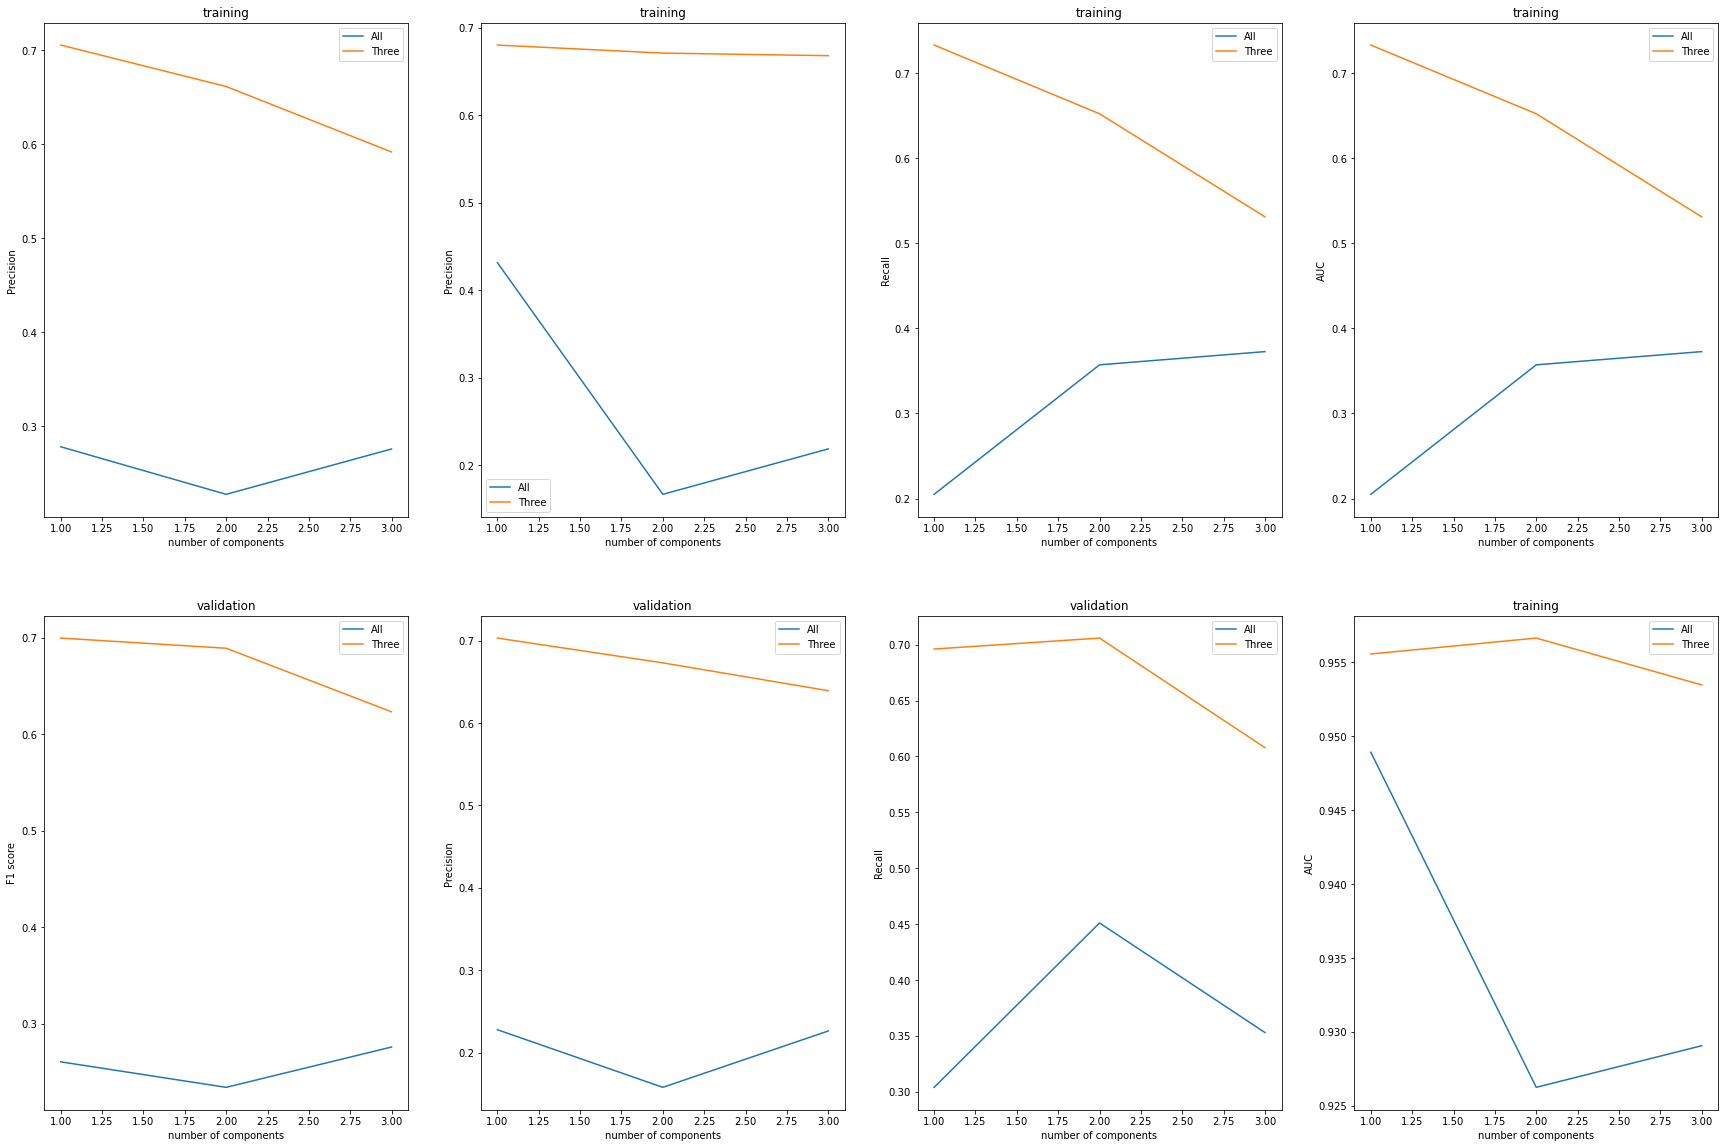

In [76]:
fig, axs = plt.subplots(2, 4,figsize=(30, 20))

tbf_tr = tb55.pivot(index='number of components', columns='number of features', values='F1_training')
axs[0, 0].plot(tbf_tr,label='number of features')
axs[0, 0].set_xlabel("number of components")
axs[0, 0].set_ylabel("Precision")
axs[0, 0].set_title('training')
axs[0, 0].legend(['All', 'Three'])

tbp_tr = tb55.pivot(index='number of components', columns='number of features', values='precision_training')
axs[0, 1].plot(tbp_tr,label='number of features')
axs[0, 1].set_xlabel("number of components")
axs[0, 1].set_ylabel("Precision")
axs[0, 1].set_title('training')
axs[0, 1].legend(['All', 'Three'])

tbr_tr = tb55.pivot(index='number of components', columns='number of features', values='recall_training')
axs[0, 2].plot(tbr_tr,label='number of features')
axs[0, 2].set_xlabel("number of components")
axs[0, 2].set_ylabel("Recall")
axs[0, 2].set_title('training')
axs[0, 2].legend(['All', 'Three'])

tba_tr = tb55.pivot(index='number of components', columns='number of features', values='AUC_training')
axs[0, 3].plot(tbr_tr,label='number of features')
axs[0, 3].set_xlabel("number of components")
axs[0, 3].set_ylabel("AUC")
axs[0, 3].set_title('training')
axs[0, 3].legend(['All', 'Three'])

tbf_va = tb55.pivot(index='number of components', columns='number of features', values='F1_validation')
axs[1, 0].plot(tbf_va,label='number of features')
axs[1, 0].set_xlabel("number of components")
axs[1, 0].set_ylabel("F1 score")
axs[1, 0].set_title('validation')
axs[1, 0].legend(['All', 'Three'])

tbp_va = tb55.pivot(index='number of components', columns='number of features', values='precision_validation')
axs[1, 1].plot(tbp_va,label='number of features')
axs[1, 1].set_xlabel("number of components")
axs[1, 1].set_ylabel("Precision")
axs[1, 1].set_title('validation')
axs[1, 1].legend(['All', 'Three'])

tbr_va = tb55.pivot(index='number of components', columns='number of features', values='recall_validation')
axs[1, 2].plot(tbr_va,label='number of features')
axs[1, 2].set_xlabel("number of components")
axs[1, 2].set_ylabel("Recall")
axs[1, 2].set_title('validation')
axs[1, 2].legend(['All', 'Three'])

tba_va = tb55.pivot(index='number of components', columns='number of features', values='AUC_validation')
axs[1, 3].plot(tba_va,label='number of features')
axs[1, 3].set_xlabel("number of components")
axs[1, 3].set_ylabel("AUC")
axs[1, 3].set_title('training')
axs[1, 3].legend(['All', 'Three'])

#tb5.plot()
#tb5.plot(x='number of components',y='F1_training',color='number of features')
#plt.legend()

# Table and plots for two gaussian models

In [77]:
# tb5 = pd.DataFrame(f1p5_train)

tb5 = pd.DataFrame({
    'F1_training': f1p5_train,
    'precision_training': pre5_train,
    'recall_training': rec5_train,
    'AUC_training': auc5_train,
    'F1_validation': f1p5_val,
    'precision_validation': pre5_val,
    'recall_validation': rec5_val,
    'AUC_validation': auc5_val,
    'number of features': ['one']*4 + ['three']*4,
    'number of components': [1,2,3,4,1,2,3,4]
    
})
tb5

,F1_training,precision_training,recall_training,AUC_training,F1_validation,precision_validation,recall_validation,AUC_validation,number of features,number of components
0,0.681004,0.805085,0.590062,None,0.662857,0.794521,0.568627,None,one,1
1,0.681004,0.805085,0.590062,None,0.662857,0.794521,0.568627,None,one,2
2,0.681898,0.785425,0.602484,None,0.662857,0.794521,0.568627,None,one,3
3,0.682143,0.802521,0.593168,None,0.662857,0.794521,0.568627,None,one,4
4,0.775777,0.820069,0.736025,None,0.797814,0.901235,0.715686,None,three,1
5,0.776167,0.806020,0.748447,None,0.789189,0.879518,0.715686,None,three,2
6,0.779436,0.836299,0.729814,None,0.806452,0.892857,0.735294,None,three,3
7,0.774495,0.775701,0.773292,None,0.806452,0.892857,0.735294,None,three,4


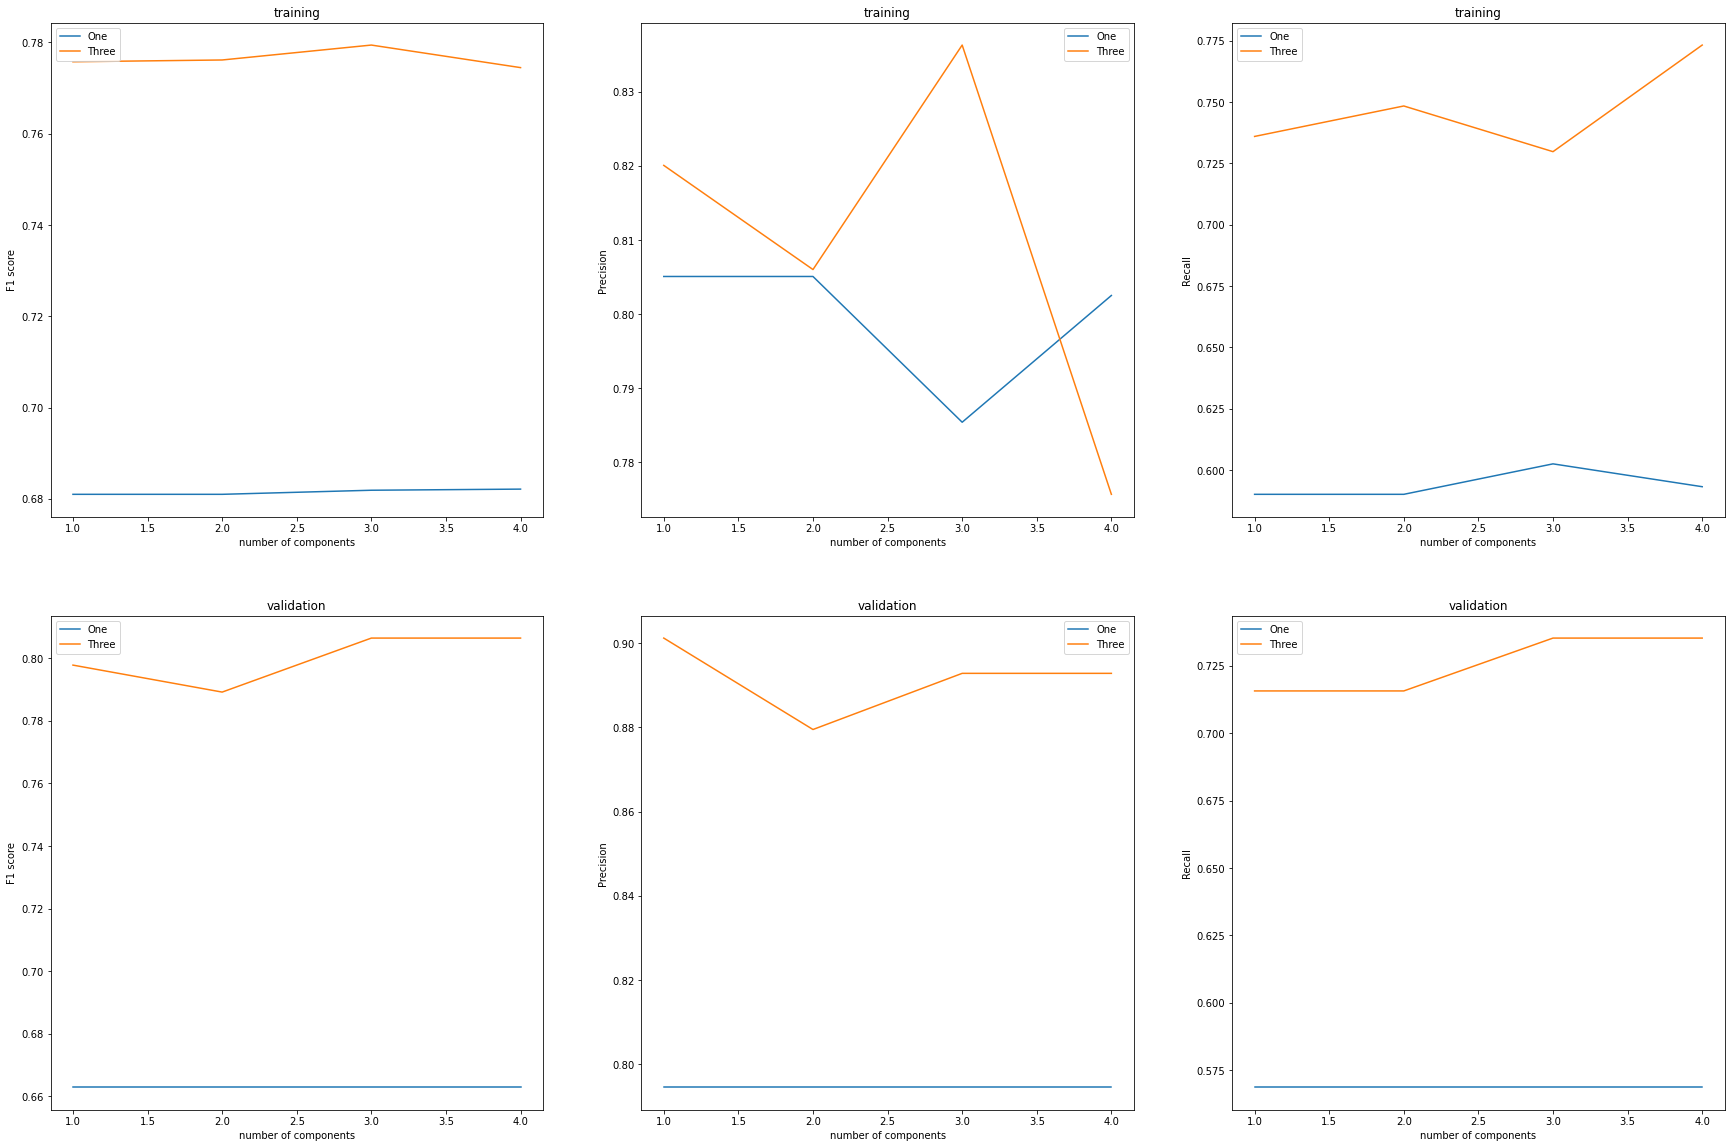

In [78]:
fig, axs = plt.subplots(2, 3,figsize=(30, 20))

tbf_tr = tb5.pivot(index='number of components', columns='number of features', values='F1_training')
axs[0, 0].plot(tbf_tr,label='number of features')
axs[0, 0].set_xlabel("number of components")
axs[0, 0].set_ylabel("F1 score")
axs[0, 0].set_title('training')
axs[0, 0].legend(['One', 'Three'])

tbp_tr = tb5.pivot(index='number of components', columns='number of features', values='precision_training')
axs[0, 1].plot(tbp_tr,label='number of features')
axs[0, 1].set_xlabel("number of components")
axs[0, 1].set_ylabel("Precision")
axs[0, 1].set_title('training')
axs[0, 1].legend(['One', 'Three'])

tbr_tr = tb5.pivot(index='number of components', columns='number of features', values='recall_training')
axs[0, 2].plot(tbr_tr,label='number of features')
axs[0, 2].set_xlabel("number of components")
axs[0, 2].set_ylabel("Recall")
axs[0, 2].set_title('training')
axs[0, 2].legend(['One', 'Three'])

tbf_va = tb5.pivot(index='number of components', columns='number of features', values='F1_validation')
axs[1, 0].plot(tbf_va,label='number of features')
axs[1, 0].set_xlabel("number of components")
axs[1, 0].set_ylabel("F1 score")
axs[1, 0].set_title('validation')
axs[1, 0].legend(['One', 'Three'])

tbp_va = tb5.pivot(index='number of components', columns='number of features', values='precision_validation')
axs[1, 1].plot(tbp_va,label='number of features')
axs[1, 1].set_xlabel("number of components")
axs[1, 1].set_ylabel("Precision")
axs[1, 1].set_title('validation')
axs[1, 1].legend(['One', 'Three'])

tbr_va = tb5.pivot(index='number of components', columns='number of features', values='recall_validation')
axs[1, 2].plot(tbr_va,label='number of features')
axs[1, 2].set_xlabel("number of components")
axs[1, 2].set_ylabel("Recall")
axs[1, 2].set_title('validation')
axs[1, 2].legend(['One', 'Three'])

#tb5.plot()
#tb5.plot(x='number of components',y='F1_training',color='number of features')
#plt.legend()

Overall comparison of 14 models:

For our eight two-Gaussian models, the seventh model with 3 features (V12, V14, V17) and 3 components for fraud transaction on validation set provides best F1 score: 0.806, and it also gives the best F1 score over all 14 models. We choose the seventh over eighth with 4 components is because it is simpler.

Comparing training and validation models for one gaussian and two gaussian, we can see that almost all these models have better F1 on validation set. 

For one Gaussian and two Gaussian models fitting on V12,V14,V17, we can observe that two Guassian models performs better for theses same features. So in this case, we achieve higher F1 for increasing components on only fraud transaction samples, rather than increasing components on whole data set. 

One Gaussian:

For our six one-Gaussian models, fitting three features gives significantly higher F1 than fitting all features, therefore, dimensionality reduction can gives us better model performance. Fitting all features is considered to be overfitting, since it has poor performance.

Incresing components does not give better performance regardless of three features or all the features.

Two Gaussian:

For the model with single feature, increasing components of gaussian on fraud transaction does not increase the performance. While increasing components of fraud transaction for multiple feature model, F1 score for training and validation set increases at first(component 1-3) but decrease afterward(component 4).

Comparing overall F1 score on single feature and multiple features, we can observe that model of 3 features gives higher F1 score regardless number of components.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


We pick the two Gaussian model on (V12, V14, V17), with one component for valid transaction and three components for fraud transaction.

In [79]:
### 6: two gaussian model with V12, V14, V17, single component for valid, three component for fraudulent ###
gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm2 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
### Train ###
X_train_frau = pd.DataFrame(X_train[y_train['Class']==1].loc[:,['V12','V14','V17']])
X_train_nonfrau = pd.DataFrame(X_train[y_train['Class']==0].loc[:,['V12','V14','V17']])
gm1.fit(X_train_nonfrau)
gm2.fit(X_train_frau)
    
s1 = gm1.score_samples(pd.DataFrame(X_test.loc[:,['V12','V14','V17']]))
s2 = gm2.score_samples(pd.DataFrame(X_test.loc[:,['V12','V14','V17']]))
    
f1=[]
pre=[]
rec=[]
c_l=[]
c=0
while (c < 10.1):
    c_l.append(c)
    f1.append(f1_score(y_test, s1 < c*s2))
    pre.append(precision_score(y_test, s1 < c*s2)) 
    rec.append(recall_score(y_test, s1 < c*s2))
    c+=0.1

# get maximum value of f1,pre,rec and c 
# tune the index of c that produce highest f1 for rec and pre
ind=f1.index(max(f1))
# f1p5_train.append(max(f1))
#c_f1.append(c_l[f1.index(max(f1))])
# rec_test.append(rec[ind])
# pre_test.append(pre[ind])
# auc_test.append(None)


print('We are testing on two gaussian model with [V12,V14,V17], single component for valid, two component for fraud:')
print('Threshold tuned:',round(c_l[ind],2))
print('Resulting F1 score is:',max(f1))
print('Resulting Presision:', pre[ind])
print('Resulting Recall:',rec[ind])




We are testing on two gaussian model with [V12,V14,V17], single component for valid, two component for fraud:
Threshold tuned: 6.1
Resulting F1 score is: 0.8115942028985507
Resulting Presision: 0.8
Resulting Recall: 0.8235294117647058
